# tests for NDVI UDP (User Defined Processes)
This scripts run some test on the NDVI UDP mainly to verify that the 2020 hybrid cube is working <br>
<br>

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo-dev.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here we just hardcode Luxemburg
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[5.03, 51.22], [5.05, 51.22], [5.05, 51.2], [5.03, 51.2], [5.03, 51.22]
            ]]
           }

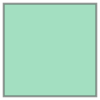

In [5]:
# show the extent Luxemburg at NUTS level-0
shape(polygon)

## NDVI dataset in original resolution and projection for year 2019

In [6]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2019)

C:\Users\BUCHHORM\Anaconda3\envs\people\lib\site-packages\openeo\metadata.py:255: UserWarning: No cube:dimensions metadata
  complain("No cube:dimensions metadata")


In [7]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./NDVI_annual-average_2019_1km.tif')

Wall time: 1min 8s


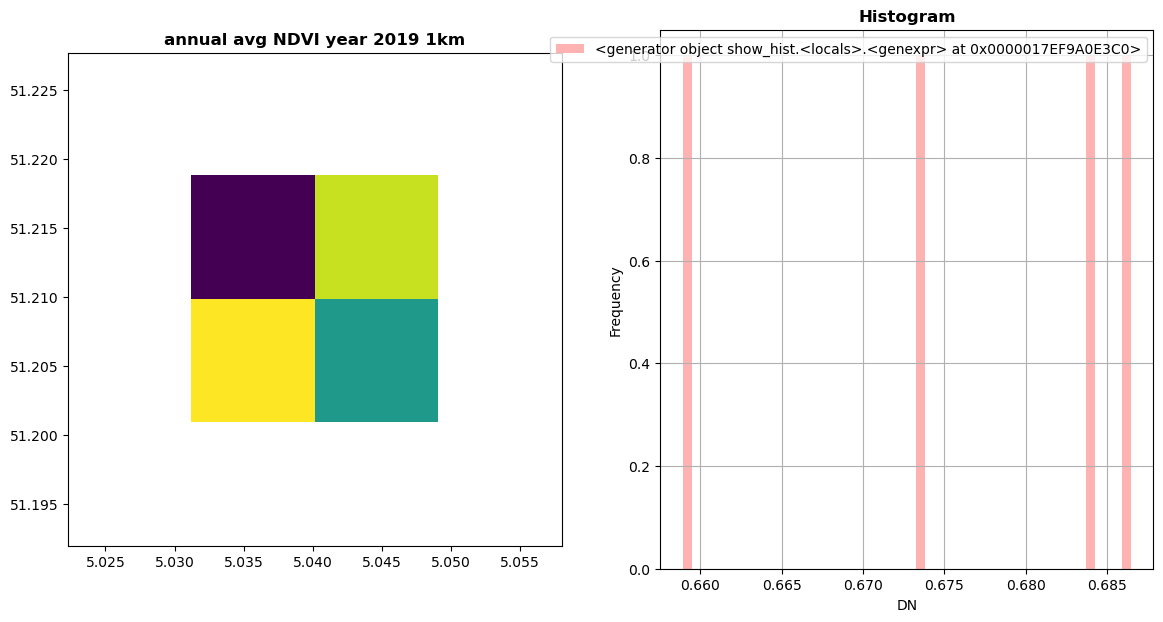

In [8]:
# visu result
with rasterio.open("NDVI_annual-average_2019_1km.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='annual avg NDVI year 2019 1km')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## NDVI dataset in original resolution and projection for year 2020 (hybrid 1km & 300m dataset)

In [10]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2020)

In [11]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./NDVI_annual-average_2020_1km.tif')

Wall time: 20.5 s


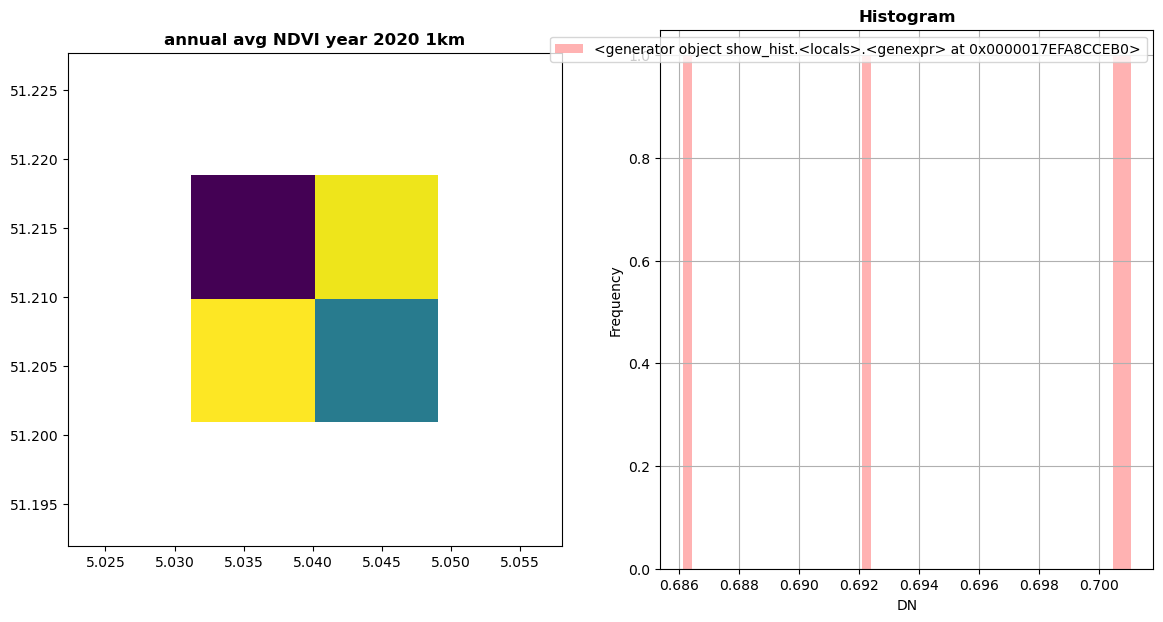

In [12]:
# visu result
with rasterio.open("NDVI_annual-average_2020_1km.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='annual avg NDVI year 2020 1km')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## NDVI dataset in original resolution and projection for year 2021 (300m dataset)

In [14]:
cube = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2021)

In [15]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./NDVI_annual-average_2021_300m.tif')

Wall time: 58.1 s


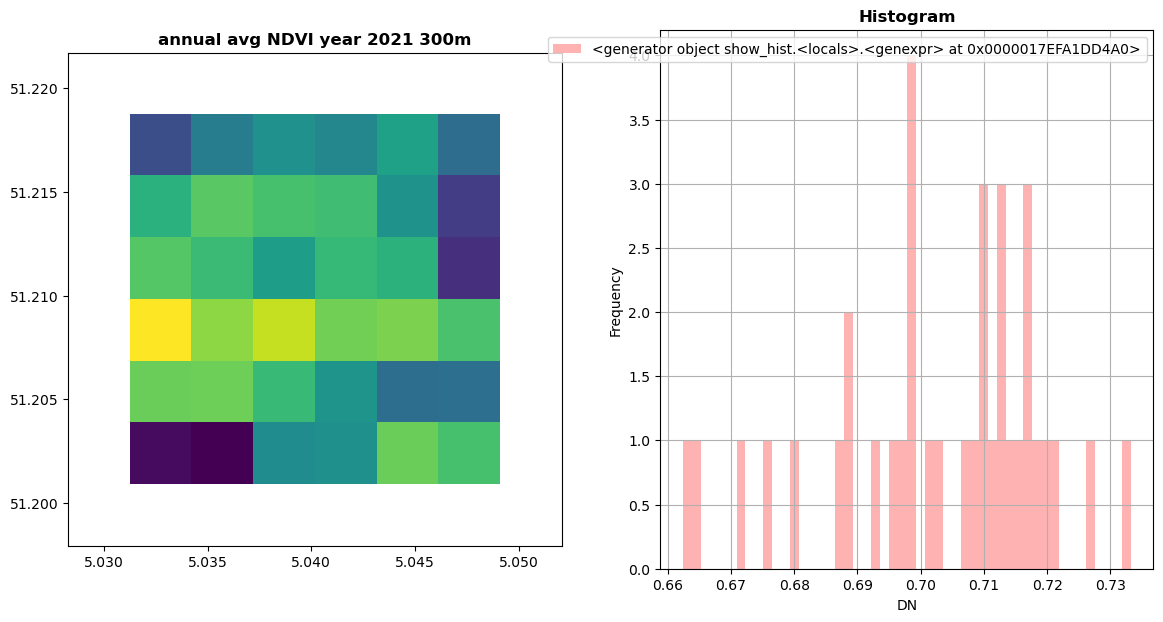

In [16]:
# visu result
with rasterio.open("NDVI_annual-average_2021_300m.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='annual avg NDVI year 2021 300m')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## reprojected FCOVER dataset (EPSG: 3035, 100m spatial resolution)

In [18]:
cube1 = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2019,
    output_warp=True,
    output_epsg=3035,
    resolution=300)

cube2 = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2020,
    output_warp=True,
    output_epsg=3035,
    resolution=300)

cube3 = connection.datacube_from_process(
    process_id="udp_annual_avg_ndvi",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_annual_avg_ndvi.json",
    geometry=polygon,   
    year=2021,
    output_warp=True,
    output_epsg=3035,
    resolution=300)

In [19]:
# get datasets
%time cube1.download(r'./NDVI_annual-average_2019_300m_EPSG3035.tif')
%time cube2.download(r'./NDVI_annual-average_2020_300m_EPSG3035.tif')
%time cube3.download(r'./NDVI_annual-average_2021_300m_EPSG3035.tif')

Wall time: 33.3 s
Wall time: 25.1 s
Wall time: 13.7 s


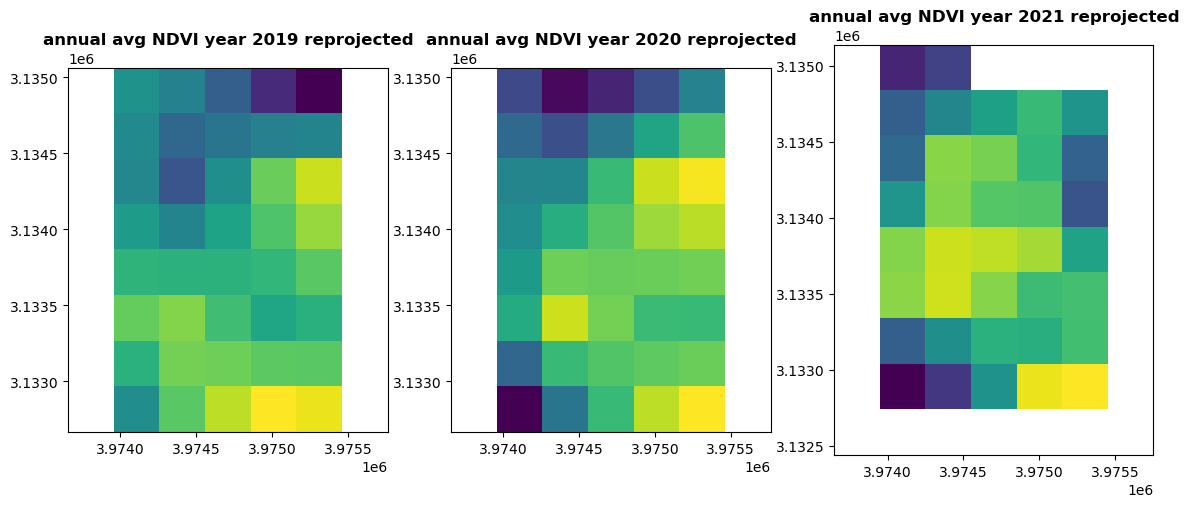

In [21]:
# visu result
with rasterio.open("NDVI_annual-average_2019_300m_EPSG3035.tif") as src, rasterio.open("NDVI_annual-average_2020_300m_EPSG3035.tif") as src2, rasterio.open("NDVI_annual-average_2021_300m_EPSG3035.tif") as src3:
    fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, figsize=(14,7))
    show(src, with_bounds=True, ax=ax1, title='annual avg NDVI year 2019 reprojected')
    show(src2, with_bounds=True, ax=ax2, title='annual avg NDVI year 2020 reprojected')
    show(src3, with_bounds=True, ax=ax3, title='annual avg NDVI year 2021 reprojected')    
    pyplot.show()